In [49]:
#librerias
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df_soc = pd.read_csv("Dataframes/Socioeconomico_2022.csv", delimiter=";")
df_soc = df_soc[["NOMBRE_COMUNA_DOMICILIO","INGRESO_PERCAPITA_GRUPO_FA","CUANTOS_TRABAJAN_GRUPO_FAM","CODIGO_REGION_DOMICILIO"]]

df_soc = df_soc[df_soc["CODIGO_REGION_DOMICILIO"] == 13].drop(columns="CODIGO_REGION_DOMICILIO")

df_soc.rename(columns={"NOMBRE_COMUNA_DOMICILIO": "COMUNA", "INGRESO_PERCAPITA_GRUPO_FA":"INGRESOS", "CUANTOS_TRABAJAN_GRUPO_FAM": "N_TRABAJAN"}, inplace=True)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace("99", np.nan)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace(" ", np.nan)
df_soc.INGRESOS = df_soc.INGRESOS.astype("float32")


df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(16, 0)
df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(99, np.nan)

df_soc_grande = df_soc.copy(deep=True)

df_soc_median = df_soc.groupby(by="COMUNA").median()

df_soc_median.head()

C:\Users\Pug\AppData\Local\Temp\ipykernel_9992\1204090862.py:1: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_soc = pd.read_csv("Dataframes/Socioeconomico_2022.csv", delimiter=";")


,INGRESOS,N_TRABAJAN
COMUNA,,
ALHUE,3.0,1.0
BUIN,4.0,1.0
CALERA DE TANGO,5.0,1.0
CERRILLOS,3.0,1.0
CERRO NAVIA,3.0,1.0


In [51]:
df = pd.read_csv("Dataframes/Puntajes_2022.csv", delimiter=";")
df[df.CLEC_ACTUAL == " "]
df.columns

Index(['MRUN', 'ANYO_PROCESO', 'COD_SEXO', 'FECHA_NACIMIENTO', 'RBD',
       'CODIGO_ENS', 'LOCAL_EDUCACIONAL', 'UNIDAD_EDUCATIVA',
       'NOMBRE_UNIDAD_EDUC', 'RAMA_EDUCACIONAL', 'DEPENDENCIA',
       'CODIGO_REGION_EGRESO', 'NOMBRE_REGION_EGRESO',
       'CODIGO_PROVINCIA_EGRESO', 'NOMBRE_PROVINCIA_EGRESO',
       'CODIGO_COMUNA_EGRESO', 'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO',
       'PROMEDIO_NOTAS', 'PTJE_NEM', 'PORC_SUP_NOTAS', 'PTJE_RANKING',
       'CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL',
       'PROM_CM_ACTUAL', 'PERCENTIL_CM_ACTUAL', 'BEA', 'CLEC_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'PROM_CM_ANTERIOR',
       'PERCENTIL_CM_ANTERIOR', 'PUNTAJES_PROCESO', 'PRUEBA_CL', 'FORMA_CL',
       'CORRECTAS_CL', 'ERRADAS_CL', 'OMITIDAS_CL', 'PRUEBA_MATE',
       'FORMA_MATE', 'CORRECTAS_MATE', 'ERRADAS_MATE', 'OMITIDAS_MATE',
       'PRUEBA_HCS', 'FORMA_HCS', 'CORRECTAS_HCS', 'ERRADAS_HCS',
       'OMITIDAS_HCS', 'PRUEBA_CBIO', 'FORMA_

In [52]:
df_puntajes = df[["PROMEDIO_NOTAS", "PTJE_RANKING", "CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL", "CIEN_ACTUAL", "NOMBRE_COMUNA_EGRESO", "ANYO_DE_EGRESO", "CODIGO_REGION_EGRESO"]]
df_puntajes = df_puntajes[df_puntajes["CODIGO_REGION_EGRESO"] == 13]
df_puntajes = df_puntajes[df_puntajes["ANYO_DE_EGRESO"] == 2021].reset_index().drop(columns=["CODIGO_REGION_EGRESO", "ANYO_DE_EGRESO", "index"])
df_puntajes.info()
df_puntajes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROMEDIO_NOTAS        73526 non-null  object
 1   PTJE_RANKING          73526 non-null  int64 
 2   CLEC_ACTUAL           73526 non-null  object
 3   MATE_ACTUAL           73526 non-null  object
 4   HCSO_ACTUAL           73526 non-null  object
 5   CIEN_ACTUAL           73526 non-null  object
 6   NOMBRE_COMUNA_EGRESO  73526 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.9+ MB


,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,"6,35",772,303,369,373,0,CONCHALI
1,"5,5",583,384,396,479,0,COLINA
2,"6,45",850,0,0,0,0,HUECHURABA
3,"5,37",528,359,369,491,0,MACUL
4,"5,35",519,423,325,508,0,COLINA


In [53]:
l = ["CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL","CIEN_ACTUAL"]
for col in l:
    df_puntajes[col] = df_puntajes[col].replace(" ", np.nan)

    df_puntajes[col] = df_puntajes[col].replace("0", np.nan)


df_puntajes["PROMEDIO_NOTAS"] = df_puntajes["PROMEDIO_NOTAS"].replace(" ", np.nan)
df_puntajes['PROMEDIO_NOTAS'] = df_puntajes['PROMEDIO_NOTAS'].str.replace(',', '.')
df_puntajes = df_puntajes.astype({"CLEC_ACTUAL": "float32","MATE_ACTUAL": "float32","HCSO_ACTUAL": "float32","CIEN_ACTUAL": "float32", "NOMBRE_COMUNA_EGRESO": "category", "PROMEDIO_NOTAS": "float32"})
df_puntajes_grande = df_puntajes
df_puntajes.head()

,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,6.35,772,303.0,369.0,373.0,NaN,CONCHALI
1,5.50,583,384.0,396.0,479.0,NaN,COLINA
2,6.45,850,NaN,NaN,NaN,NaN,HUECHURABA
3,5.37,528,359.0,369.0,491.0,NaN,MACUL
4,5.35,519,423.0,325.0,508.0,NaN,COLINA


In [54]:
df_promedio = df_puntajes.groupby(by="NOMBRE_COMUNA_EGRESO").mean()
df_promedio.reset_index(inplace=True)
df_promedio = df_promedio.rename(columns={"NOMBRE_COMUNA_EGRESO":"COMUNA", "PTJE_RANKING" : "RANKING", "PROMEDIO_NOTAS": "NEM", "CLEC_ACTUAL": "LENGUAJE", "MATE_ACTUAL": "MATEMATICAS", "HCSO_ACTUAL" :"HISTORIA", "CIEN_ACTUAL": "CIENCIAS"})
#df_promedio.to_csv("Dataframes/promedio_puntajes_pdt.csv", sep=",", index=False)


In [ ]:
df_soc.head()

In [64]:
df_todo = df_promedio.merge(df_soc, on="COMUNA")
df_todo_grande = df_promedio.merge(df_soc_grande, on="COMUNA")
df_todo_grande.head()
df_todo_grande.to_csv("Dataframes/promedio_puntajes_pdt.csv", sep=",", index=False)

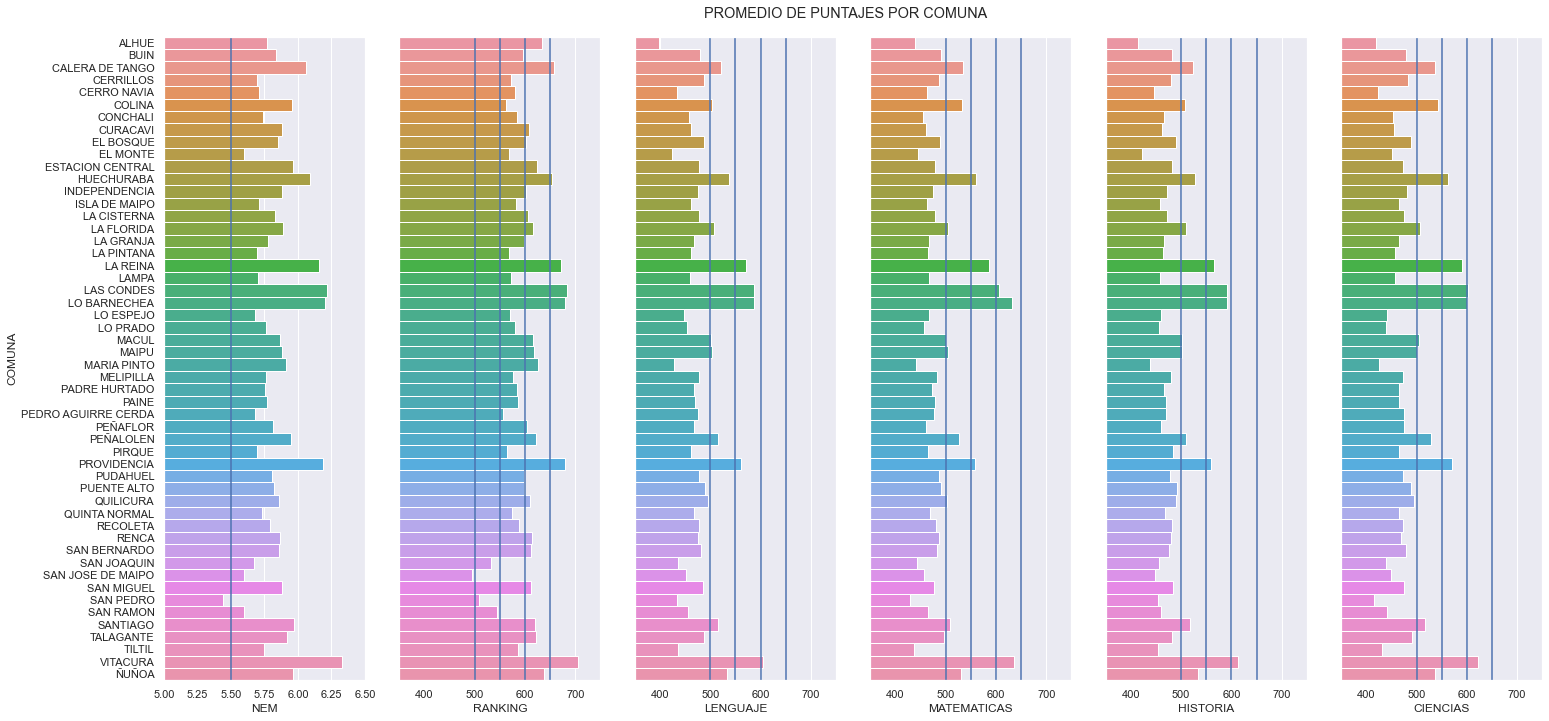

In [57]:
f, ax = plt.subplots(1,6, figsize=(20,10), sharey=True)
sns.set(font_scale=1)
cols = df_promedio.columns[1:]
f.suptitle("PROMEDIO DE PUNTAJES POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,6.5)
ax[0].axvline(5.5)
for i in range(0,6):
    if i != 0:
        ax[i].yaxis.set_visible(False)
        ax[i].set_xlim(350,750)
        ax[i].axvline(650)
        ax[i].axvline(600)
        ax[i].axvline(550)
        ax[i].axvline(500)
    sns.barplot(df_promedio, y="COMUNA", x=cols[i], ax=ax[i],width=1)


In [58]:
comunas = gpd.read_file("Dataframes/COMUNA/COMUNAS_2020.shp").to_crs(4326)

In [ ]:
df_todo.head()

In [60]:
def limpiar(string):
    r = ""
    for i in string:
        if i == "á":
            r += "a"
        elif i== "é":
            r += "e"
        elif i== "í":
            r += "i"
        elif i== "ó":
            r += "o"
        elif i== "ú":
            r += "u"
        else:
            r+=i
    return r

limpiar("áéíóú")

'aeiou'

In [61]:
comunas_rm = comunas[comunas["REGION"] == "Metropolitana de Santiago"].reset_index()
comunas_rm = comunas_rm[["COMUNA", "geometry"]]
comunas_rm.COMUNA = comunas_rm.COMUNA.map(lambda x:limpiar(x).upper())
comunas_rm.head()

,COMUNA,geometry
0,LO BARNECHEA,"POLYGON ((-70.33273 -33.10034, -70.33211 -33.1..."
1,PIRQUE,"POLYGON ((-70.44598 -33.57922, -70.44519 -33.5..."
2,SAN JOSE DE MAIPO,"POLYGON ((-69.86109 -34.11837, -69.86197 -34.1..."
3,PAINE,"POLYGON ((-70.61396 -33.73862, -70.61272 -33.7..."
4,MELIPILLA,"POLYGON ((-70.94808 -33.55995, -70.94808 -33.5..."


In [62]:
prom_rm = df_todo.merge(comunas_rm, on="COMUNA")
prom_rm = gpd.GeoDataFrame(prom_rm)
prom_rm.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS,N_TRABAJAN,geometry
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.59259,419.576935,7.0,1.0,"POLYGON ((-71.00925 -33.89198, -71.00817 -33.8..."
1,ALHUE,5.768235,633.235294,398.822235,438.522736,414.59259,419.576935,NaN,1.0,"POLYGON ((-71.00925 -33.89198, -71.00817 -33.8..."
2,ALHUE,5.768235,633.235294,398.822235,438.522736,414.59259,419.576935,9.0,2.0,"POLYGON ((-71.00925 -33.89198, -71.00817 -33.8..."
3,ALHUE,5.768235,633.235294,398.822235,438.522736,414.59259,419.576935,1.0,0.0,"POLYGON ((-71.00925 -33.89198, -71.00817 -33.8..."
4,ALHUE,5.768235,633.235294,398.822235,438.522736,414.59259,419.576935,NaN,NaN,"POLYGON ((-71.00925 -33.89198, -71.00817 -33.8..."


NEM



KeyboardInterrupt



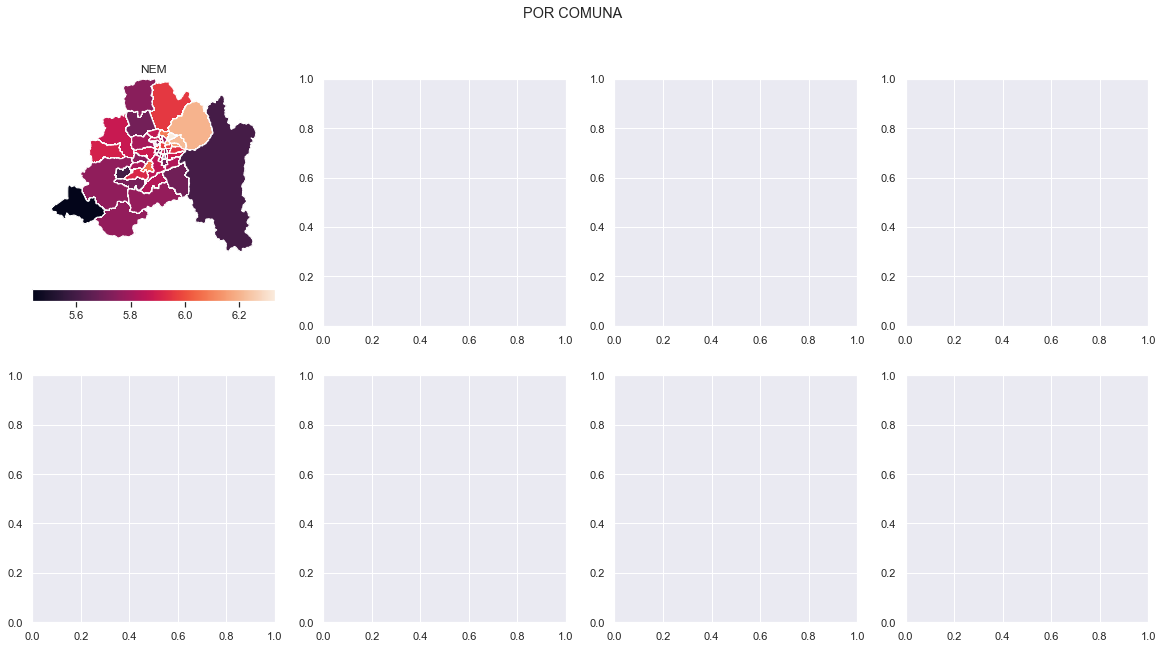

In [63]:
f, ax = plt.subplots(2,4, figsize=(20,10))
cols = prom_rm.columns[1:9]
f.suptitle("POR COMUNA")
for i in range(0,2):
    for j in range(0,4):
        ax[i][j].margins(0.0001, 0.0001)
        ax[i][j].set_axis_off()
        ax[i][j].set_title(cols[i*4+j])
        print(cols[i*4+j])
        prom_rm.plot(column=cols[i*4+j], legend=True, ax=ax[i][j], legend_kwds={'orientation': "horizontal"})




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error